<a href="https://colab.research.google.com/github/Sockcave/Yelp/blob/main/models_yelp_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading in the Data

In [1]:
business_cleaned_id = "1X1Ouplhlc7AQRwZao6WV3zlDJLbeu0CS"
!gdown https://drive.google.com/uc?id={business_cleaned_id}

Downloading...
From: https://drive.google.com/uc?id=1X1Ouplhlc7AQRwZao6WV3zlDJLbeu0CS
To: /content/business_cleaned.csv
7.54MB [00:00, 35.3MB/s]


In [2]:
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
business = pd.read_csv('/content/business_cleaned.csv', engine='python')
business

,Unnamed: 0,attributes.Alcohol,attributes.BYOB,attributes.BYOBCorkage,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.HappyHour,attributes.HasTV,attributes.OutdoorSeating,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.WheelchairAccessible,attributes.WiFi,is_open,latitude,longitude,na_counts,review_count,stars,totalhours.Friday,totalhours.Monday,totalhours.Saturday,totalhours.Sunday,totalhours.Thursday,totalhours.Tuesday,totalhours.Wednesday,dessert,latenight_food,lunch,dinner,brunch,breakfast,romantic,intimate,touristy,hipster,divey,classy,trendy,upscale,casual,garage parking,street parking,validated parking,parking lot,valet parking
0,0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,NaN,1.0,NaN,1.0,0,30.264896,-97.731028,21,137,4.0,14.5,6.0,7.0,6.0,14.5,12.5,12.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0,45.467868,-122.714524,15,99,4.0,7.0,24.0,7.0,7.0,7.0,7.0,7.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,40.145557,-82.977284,39,107,4.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,1.0,NaN,1.0,1.0,1.0,0.0,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1,45.522796,-122.657872,13,1236,4.5,5.0,24.0,5.0,-1.0,5.0,5.0,5.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4,1.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,NaN,0.0,0,40.117275,-83.068481,19,8,4.0,6.0,-1.0,6.0,5.0,6.0,6.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,36335,0.0,NaN,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,0,42.423278,-71.063220,23,11,3.0,11.0,11.0,11.0,-1.0,11.0,11.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36336,36336,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,1,42.395586,-71.040259,25,15,2.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36337,36337,1.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,NaN,0.0,1,33.756987,-84.392982,20,118,3.5,5.0,-1.0,5.0,-1.0,5.0,5.0,5.0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
36338,36338,0.0,0.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,0.0,1.0,1,45.558409,-122.865780,20,31,4.0,11.0,24.0,11.0,11.0,10.5,10.5,10.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### Extracting the Top Features

In [4]:
top_features = business.loc[:, ['lunch', 'attributes.GoodForKids', 'touristy', 'attributes.HappyHour', 'attributes.RestaurantsTakeOut', 'breakfast', 
                 'attributes.BYOB', 'attributes.DogsAllowed', 'attributes.RestaurantsGoodForGroups', 
                 'attributes.BusinessAcceptsCreditCards', 'attributes.RestaurantsReservations', 'attributes.Alcohol', 'attributes.HasTV', 
                 'attributes.RestaurantsPriceRange2', 'dinner', 'attributes.OutdoorSeating', 'attributes.DriveThru', 
                 'classy', 'attributes.BikeParking', 'attributes.RestaurantsDelivery']]

In [5]:
top_features

,lunch,attributes.GoodForKids,touristy,attributes.HappyHour,attributes.RestaurantsTakeOut,breakfast,attributes.BYOB,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsReservations,attributes.Alcohol,attributes.HasTV,attributes.RestaurantsPriceRange2,dinner,attributes.OutdoorSeating,attributes.DriveThru,classy,attributes.BikeParking,attributes.RestaurantsDelivery
0,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0,1.0,NaN,0,NaN,1.0
1,1,1.0,0,NaN,1.0,1,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0,0.0,NaN,0,1.0,0.0
2,0,1.0,0,NaN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,1,NaN,1.0
3,0,0.0,0,0.0,1.0,0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1,0.0,NaN,1,1.0,0.0
4,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0,0.0,NaN,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,0.0,NaN,0,NaN,1.0
36336,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,NaN,NaN,0,NaN,1.0
36337,0,0.0,0,NaN,0.0,0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,1,0.0,NaN,1,0.0,0.0
36338,0,NaN,0,NaN,1.0,0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,0,NaN,NaN,1,1.0,1.0


In [6]:
len(np.unique(top_features.columns))

20

In [7]:
np.unique(top_features.columns)

array(['attributes.Alcohol', 'attributes.BYOB', 'attributes.BikeParking',
       'attributes.BusinessAcceptsCreditCards', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForKids',
       'attributes.HappyHour', 'attributes.HasTV',
       'attributes.OutdoorSeating', 'attributes.RestaurantsDelivery',
       'attributes.RestaurantsGoodForGroups',
       'attributes.RestaurantsPriceRange2',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsTakeOut', 'breakfast', 'classy', 'dinner',
       'lunch', 'touristy'], dtype=object)

In [8]:
top_features.columns

Index(['lunch', 'attributes.GoodForKids', 'touristy', 'attributes.HappyHour',
       'attributes.RestaurantsTakeOut', 'breakfast', 'attributes.BYOB',
       'attributes.DogsAllowed', 'attributes.RestaurantsGoodForGroups',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsReservations', 'attributes.Alcohol',
       'attributes.HasTV', 'attributes.RestaurantsPriceRange2', 'dinner',
       'attributes.OutdoorSeating', 'attributes.DriveThru', 'classy',
       'attributes.BikeParking', 'attributes.RestaurantsDelivery'],
      dtype='object')

In [9]:
len(top_features.columns)

20

### Top Features Dataset

In [10]:
business['is_open']

0        0
1        0
2        1
3        1
4        0
        ..
36335    0
36336    1
36337    1
36338    1
36339    0
Name: is_open, Length: 36340, dtype: int64

In [11]:
top_features_with_dep = top_features.copy(deep=True)
top_features_with_dep

,lunch,attributes.GoodForKids,touristy,attributes.HappyHour,attributes.RestaurantsTakeOut,breakfast,attributes.BYOB,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsReservations,attributes.Alcohol,attributes.HasTV,attributes.RestaurantsPriceRange2,dinner,attributes.OutdoorSeating,attributes.DriveThru,classy,attributes.BikeParking,attributes.RestaurantsDelivery
0,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0,1.0,NaN,0,NaN,1.0
1,1,1.0,0,NaN,1.0,1,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0,0.0,NaN,0,1.0,0.0
2,0,1.0,0,NaN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,1,NaN,1.0
3,0,0.0,0,0.0,1.0,0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1,0.0,NaN,1,1.0,0.0
4,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0,0.0,NaN,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,0.0,NaN,0,NaN,1.0
36336,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,NaN,NaN,0,NaN,1.0
36337,0,0.0,0,NaN,0.0,0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,1,0.0,NaN,1,0.0,0.0
36338,0,NaN,0,NaN,1.0,0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,0,NaN,NaN,1,1.0,1.0


In [12]:
# Appending back to our dataset, our dependent variable
top_features_with_dep['is_open'] = business['is_open']
top_features_with_dep

,lunch,attributes.GoodForKids,touristy,attributes.HappyHour,attributes.RestaurantsTakeOut,breakfast,attributes.BYOB,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsReservations,attributes.Alcohol,attributes.HasTV,attributes.RestaurantsPriceRange2,dinner,attributes.OutdoorSeating,attributes.DriveThru,classy,attributes.BikeParking,attributes.RestaurantsDelivery,is_open
0,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0,1.0,NaN,0,NaN,1.0,0
1,1,1.0,0,NaN,1.0,1,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0,0.0,NaN,0,1.0,0.0,0
2,0,1.0,0,NaN,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,1,NaN,1.0,1
3,0,0.0,0,0.0,1.0,0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1,0.0,NaN,1,1.0,0.0,1
4,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0,0.0,NaN,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36335,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,0.0,NaN,0,NaN,1.0,0
36336,0,1.0,0,NaN,1.0,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,1.0,0,NaN,NaN,0,NaN,1.0,1
36337,0,0.0,0,NaN,0.0,0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,1,0.0,NaN,1,0.0,0.0,1
36338,0,NaN,0,NaN,1.0,0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,0,NaN,NaN,1,1.0,1.0,1


In [13]:
b = top_features_with_dep.columns[top_features_with_dep.isna().any()].tolist()
b

['attributes.GoodForKids',
 'attributes.HappyHour',
 'attributes.RestaurantsTakeOut',
 'attributes.BYOB',
 'attributes.DogsAllowed',
 'attributes.RestaurantsGoodForGroups',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.RestaurantsReservations',
 'attributes.Alcohol',
 'attributes.HasTV',
 'attributes.RestaurantsPriceRange2',
 'attributes.OutdoorSeating',
 'attributes.DriveThru',
 'attributes.BikeParking',
 'attributes.RestaurantsDelivery']

In [14]:
X= pd.get_dummies(top_features_with_dep.drop(columns='is_open'), columns=b)
y = top_features_with_dep['is_open']

In [15]:
# Training and Test Split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split( X, y, test_size=0.33, random_state=42)

In [16]:
# Validation Set Split
X_test_top, X_val_top, y_test_top, y_val_top = train_test_split(X_test_top, y_test_top, test_size=0.33, random_state=42)

In [17]:
X_train_top

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0
23339,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
35500,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
6357,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
6137,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
19857,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
6265,1,1,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
11284,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
860,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1


In [18]:
X_test_top

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0
1718,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
32064,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
26301,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9771,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
9558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
25439,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1
505,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1288,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


In [19]:
X_val_top

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0
6488,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
16641,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
733,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
28894,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
9790,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19591,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
460,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
273,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
17298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


In [20]:
y_train_top

23339    1
35500    0
6357     0
6137     1
19857    1
        ..
16850    1
6265     1
11284    0
860      1
15795    1
Name: is_open, Length: 24347, dtype: int64

In [21]:
y_test_top

1718     0
32064    1
26301    0
9771     1
9558     1
        ..
8295     1
25439    1
505      0
1288     1
15974    0
Name: is_open, Length: 8035, dtype: int64

In [22]:
y_val_top

6488     0
16641    1
733      1
28894    1
9790     1
        ..
19591    1
460      0
273      0
17298    1
6308     0
Name: is_open, Length: 3958, dtype: int64

##Building some Models

**Metric Functions**

In [23]:
def custom_acc(predictions, y_test, y_train):
    return accuracy_score(y_test, predictions)
    
def tpr(predictions, y_test, y_train):
    cm = confusion_matrix(y_test, predictions)
    return cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])

def fpr(predictions, y_test, y_train):
    cm = confusion_matrix(y_test, predictions)
    return cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

### Baseline Model

In [24]:
y_train_top

23339    1
35500    0
6357     0
6137     1
19857    1
        ..
16850    1
6265     1
11284    0
860      1
15795    1
Name: is_open, Length: 24347, dtype: int64

In [25]:
np.count_nonzero(y_train_top == 1)

15565

In [26]:
np.count_nonzero(y_train_top == 0)

8782

In [27]:
# The majority class for isOpen is 1 in the training set, so for our baseline model, we will predict all 1s 
# and guage our accuracy from there
len(y_test_top)

8035

In [28]:
bm_pred = [1 for i in range(len(y_test_top))]
len(bm_pred)

8035

In [29]:
# Accuracy for Baseline Model
bm_acc = accuracy_score(y_test_top, bm_pred)
bm_acc

0.6400746733042937

In [30]:
# Confusion Matrix for Baseline Model
cm_bm = confusion_matrix(y_test_top, bm_pred)
print ("Confusion Matrix : \n", cm_bm) 

Confusion Matrix : 
 [[   0 2892]
 [   0 5143]]


In [31]:
# TPR for Baseline Model
bm_tpr = tpr(bm_pred, y_test_top, y_train_top)
bm_tpr

1.0

In [32]:
tpr(bm_pred, y_test_top, y_train_top)

1.0

In [33]:
# FPR for Baseline Model
bm_fpr = fpr(bm_pred, y_test_top, y_train_top)
bm_fpr

1.0

### Logistic Regression

In [34]:
logreg = LogisticRegression(random_state=88, max_iter=3000)
logreg.fit(X_train_top, y_train_top)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_prob = logreg.predict_proba(X_test_top)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]])

In [36]:
cm_log = confusion_matrix(y_test_top, y_pred_log)
print ("Confusion Matrix: \n", cm_log)

Confusion Matrix: 
 [[1849 1043]
 [ 602 4541]]


**Logistic Regression Metrics**

In [37]:
# Logistic Regression Accuracy
print ("\nAccuracy:", accuracy_score(y_test_top, y_pred_log))
log_acc = accuracy_score(y_test_top, y_pred_log)


Accuracy: 0.7952706907280647


In [38]:
# Logistic Regression TPR
log_tpr = tpr(y_pred_log, y_test_top, y_train_top)
log_tpr

0.8829476958973362

In [39]:
# Logistic Regression FPR
log_fpr = fpr(y_pred_log, y_test_top, y_train_top)
log_fpr

0.3606500691562932

### Random Forest Classifier

In [40]:
# Creating dummy variables for the categorical components
X_train_top_dummy = pd.get_dummies(X_train_top)
X_test_top_dummy = pd.get_dummies(X_test_top)

In [41]:
X_train_top_dummy

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0
23339,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
35500,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
6357,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
6137,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
19857,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
6265,1,1,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
11284,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
860,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1


In [42]:
# Note that the original dataset and the dataset with dummy encoding are actually the same.
X_train_top

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0
23339,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
35500,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
6357,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
6137,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
19857,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
6265,1,1,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
11284,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
860,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1


In [43]:
grid_values = {'max_features': np.linspace(1,20,5, dtype='int32'),
              'min_samples_leaf': [5], 
              'n_estimators': [500], 
              'random_state': [88]}

tic = time.time()      

rf = RandomForestClassifier()
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=2) # Using R^2 scoring metric
rf_cv.fit(X_train_top_dummy, y_train_top)

toc = time.time()
print('time:', round(tic-toc, 2), 's')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88, total=   3.4s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88, total=   3.3s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88, total=   3.3s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88, total=   3.3s
[CV] max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88 
[CV]  max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88, total=   3.4s
[CV] max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88 
[CV]  max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88, total=   6.1s
[CV] max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88 
[CV]  max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88, total=   6.0s
[CV] max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.6min finished


time: -224.84 s


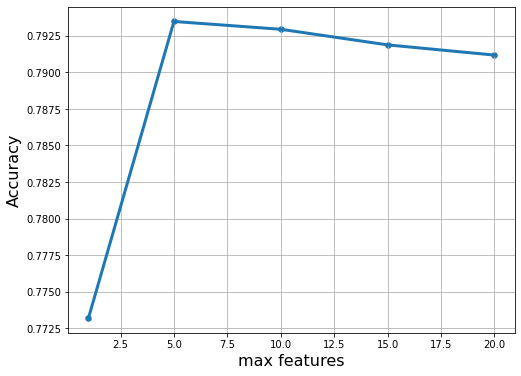

In [44]:
# Plotting the graph to determine the best hyperparameter 'm'
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
# plt.ylabel('CV R2', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')

In [45]:
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=88, verbose=0,
                       warm_start=False)

**Random Forest Classifier Metrics**

In [46]:
# Using a 0.5 threshold
y_pred_binary = (rf_cv.predict(X_test_top_dummy) >= 0.5).astype(int)
y_pred_binary

array([0, 1, 0, ..., 0, 1, 0])

In [47]:
# Random Forest Accuracy
rf_acc = accuracy_score(y_test_top, y_pred_binary)
rf_acc

0.7988799004355943

In [48]:
# Random Forest TPR
rf_tpr = tpr(y_pred_binary, y_test_top, y_train_top)
rf_tpr

0.9078358934474042

In [49]:
# Random Forest FPR
rf_fpr = fpr(y_pred_binary, y_test_top, y_train_top)
rf_fpr

0.3948824343015214

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [51]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 1}], # We decided to keep both classes of equal weight. (0 for Closed and 1 for Open)
               'random_state': [88]} 

tic = time.time()

dtc = DecisionTreeClassifier()
cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train_top_dummy, y_train_top)

toc = time.time()
print('time:', round(tic-toc, 2), 's')

Fitting 5 folds for each of 51 candidates, totalling 255 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


time: -22.81 s


[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:   22.7s finished


In [52]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0,0.771964
1,2e-05,0.774058
2,4e-05,0.774469
3,6e-05,0.777509
4,8e-05,0.779480
5,0.0001,0.779480
6,0.00012,0.781328
7,0.00014,0.781246
8,0.00016,0.779891
9,0.00018,0.779110


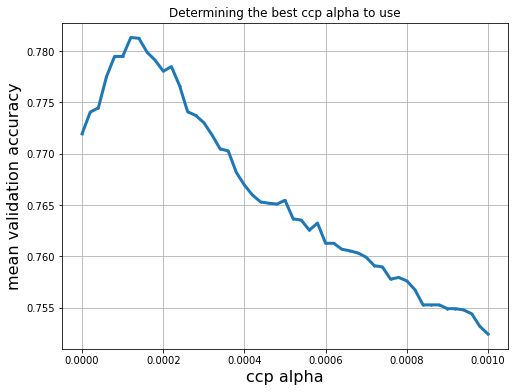

In [53]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.title('Determining the best ccp alpha to use')
plt.show()

In [54]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.00012000000000000002
Grid best score (accuracy):  0.7813283468349188


**Decision Tree Classifier Metrics**

In [55]:
# Confusion Matrix for Decision Tree Classifier
cm_dtc = confusion_matrix(y_test_top, dtc_cv_acc.predict(X_test_top_dummy))
print ("Confusion Matrix : \n", cm_dtc)

Confusion Matrix : 
 [[1711 1181]
 [ 556 4587]]


In [56]:
# Decison Tree Predictions on X_testing set
dtc_pred = dtc_cv_acc.predict(X_test_top_dummy)

In [57]:
# Decision Tree Classifier Accuracy
dtc_acc = accuracy_score(y_test_top, dtc_cv_acc.predict(X_test_top_dummy))
dtc_acc

0.7838207840696951

In [58]:
# Decision Tree Classifier TPR
dtc_tpr = tpr(dtc_pred, y_test_top, y_train_top)
dtc_tpr

0.8918918918918919

In [59]:
# Decision Tree Classifier FPR
dtc_fpr = fpr(dtc_pred, y_test_top, y_train_top)
dtc_fpr

0.40836791147994467

### Metrics Table

In [60]:
comparison_table = pd.DataFrame()

acc_list = np.array([bm_acc, log_acc, rf_acc, dtc_acc, ])
tpr_list = np.array([bm_tpr, log_tpr, rf_tpr, dtc_tpr])
fpr_list = np.array([bm_fpr, log_fpr, rf_fpr, dtc_fpr])

In [61]:
comparison_table['Accuracy'] = acc_list
comparison_table['TPR'] = tpr_list
comparison_table['FPR'] = fpr_list

In [62]:
comparison_table = comparison_table.T
comparison_table = comparison_table.rename(columns={0: "Baseline Model", 1: "Logistic Regression Model", 2: "Random Forest Classifier", 
                     3: "Decision Tree Classifier"})
comparison_table

,Baseline Model,Logistic Regression Model,Random Forest Classifier,Decision Tree Classifier
Accuracy,0.640075,0.795271,0.798880,0.783821
TPR,1.000000,0.882948,0.907836,0.891892
FPR,1.000000,0.360650,0.394882,0.408368


### Ensemble Model

In [63]:
# Creating a copy of the validation dataframe to use for blending
val_blend = X_val_top.copy(deep=True)

In [64]:
# Random Forest Classifier Validation Set Predictions
rf_val_pred = rf_cv.predict(X_val_top)
val_pred_rf= val_blend['val_pred_rf'] = rf_val_pred

In [65]:
# Decison Tree Classifier Validation Set Predictions
dtc_val_pred = dtc_cv_acc.predict(X_val_top)
val_blend['val_pred_dtc'] = dtc_val_pred

In [66]:
# Logistic Regression Validation Set Predictions
log_val_pred = logreg.predict(X_val_top)
val_blend['val_pred_log'] = log_val_pred 

In [67]:
# Appending our dependent variable to the blended dataframe
val_blend['is_open'] = y_val_top
val_blend

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0,val_pred_rf,val_pred_dtc,val_pred_log,is_open
6488,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0
16641,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0,1
733,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
28894,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1
9790,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19591,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1
460,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
273,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
17298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1


In [68]:
# Training the blending model which uses our 3 selected models
blending_ols = smf.ols(formula='is_open ~ val_pred_rf+val_pred_dtc+val_pred_log -1', data=val_blend)
blending_res = blending_ols.fit()

In [69]:
# Using our trained blending model to make predictions on the validation set
val_pred_blended = blending_res.predict(val_blend)
val_blend['pred_blended']= val_pred_blended

val_blend

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0,val_pred_rf,val_pred_dtc,val_pred_log,is_open,pred_blended
6488,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0.829478
16641,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0.540252
733,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0.000000
28894,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0.829478
9790,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0.829478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19591,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0.829478
460,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.000000
273,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.000000
17298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0.540252


In [70]:
### Create the validation dataframe for our test set, so that we can make predictions on it.
val_blend_b = X_test_top.copy(deep=True)

In [71]:
# Random Forest Classifier Test Set Predictions
rf_valb_pred = rf_cv.predict(X_test_top)
val_blend_b['val_pred_rf'] = rf_valb_pred

In [72]:
# Decision Tree Classifier Test Set Predictions
dtc_valb_pred = dtc_cv_acc.predict(X_test_top)
val_blend_b['val_pred_dtc'] = dtc_valb_pred

In [73]:
# Logistic Regression Test Set Predictions
log_valb_pred = logreg.predict(X_test_top)
val_blend_b['val_pred_log'] = log_valb_pred 

In [74]:
# Appending our dependent variable to the validation B dataframe
val_blend_b['is_open'] = y_test_top
val_blend_b

,lunch,touristy,breakfast,dinner,classy,attributes.GoodForKids_0.0,attributes.GoodForKids_1.0,attributes.HappyHour_0.0,attributes.HappyHour_1.0,attributes.RestaurantsTakeOut_0.0,attributes.RestaurantsTakeOut_1.0,attributes.BYOB_0.0,attributes.BYOB_1.0,attributes.DogsAllowed_0.0,attributes.DogsAllowed_1.0,attributes.RestaurantsGoodForGroups_0.0,attributes.RestaurantsGoodForGroups_1.0,attributes.BusinessAcceptsCreditCards_0.0,attributes.BusinessAcceptsCreditCards_1.0,attributes.RestaurantsReservations_0.0,attributes.RestaurantsReservations_1.0,attributes.Alcohol_0.0,attributes.Alcohol_1.0,attributes.HasTV_0.0,attributes.HasTV_1.0,attributes.RestaurantsPriceRange2_0.0,attributes.RestaurantsPriceRange2_1.0,attributes.RestaurantsPriceRange2_2.0,attributes.RestaurantsPriceRange2_3.0,attributes.RestaurantsPriceRange2_4.0,attributes.OutdoorSeating_0.0,attributes.OutdoorSeating_1.0,attributes.DriveThru_0.0,attributes.DriveThru_1.0,attributes.BikeParking_0.0,attributes.BikeParking_1.0,attributes.RestaurantsDelivery_0.0,attributes.RestaurantsDelivery_1.0,val_pred_rf,val_pred_dtc,val_pred_log,is_open
1718,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
32064,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1
26301,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9771,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1
9558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1
25439,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1
505,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1288,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1


In [75]:
# Subset of the validation B dataframe that includes the model predictions
blended_models_test = val_blend_b[['val_pred_rf', 'val_pred_dtc', 'val_pred_log']]
blended_models_test

,val_pred_rf,val_pred_dtc,val_pred_log
1718,0,0,0
32064,1,1,1
26301,0,0,0
9771,1,1,1
9558,1,1,1
...,...,...,...
8295,1,1,1
25439,1,1,1
505,0,0,0
1288,1,1,1


In [76]:
# Outputs the probabilities of our test set predictions
test_pred_blended = blending_res.predict(blended_models_test)
test_pred_blended

1718     0.000000
32064    0.829478
26301    0.000000
9771     0.829478
9558     0.829478
           ...   
8295     0.829478
25439    0.829478
505      0.000000
1288     0.829478
15974    0.000000
Length: 8035, dtype: float64

In [77]:
# Setting a 0.5 threshold to classify our probabilities
test_pred_blended_threshold = pd.Series([1 if x > 0.5 else 0 for x in test_pred_blended])
test_pred_blended_threshold

0       0
1       1
2       0
3       1
4       1
       ..
8030    1
8031    1
8032    0
8033    1
8034    0
Length: 8035, dtype: int64

In [78]:
# Checking the unique values
np.unique(test_pred_blended_threshold)

array([0, 1])

**Blended Model Metrics**

In [79]:
# Blended Model Accuracy
blend_acc = accuracy_score(y_test_top, test_pred_blended_threshold)
blend_acc

0.7991288114499067

In [80]:
# Blended Model TPR
blend_tpr = tpr(test_pred_blended_threshold, y_test_top, y_train_top)
blend_tpr

0.904141551623566

In [81]:
# Blended Model FPR
blend_fpr = fpr(test_pred_blended_threshold, y_test_top, y_train_top)
blend_fpr

0.3876210235131397

### Final Metrics Table

In [82]:
final_comparison_table = pd.DataFrame()

acc_list_final = np.array([bm_acc, log_acc, rf_acc, dtc_acc, blend_acc])
tpr_list_final = np.array([bm_tpr, log_tpr, rf_tpr, dtc_tpr, blend_tpr])
fpr_list_final = np.array([bm_fpr, log_fpr, rf_fpr, dtc_fpr, blend_fpr])

In [83]:
final_comparison_table['Accuracy'] = acc_list_final
final_comparison_table['TPR'] = tpr_list_final
final_comparison_table['FPR'] = fpr_list_final

In [84]:
final_comparison_table = final_comparison_table.T
final_comparison_table = final_comparison_table.rename(columns={0: "Baseline Model", 1: "Logistic Regression Model", 2: "Random Forest Classifier", 
                     3: "Decision Tree Classifier", 4: "Blended Model"})
final_comparison_table

,Baseline Model,Logistic Regression Model,Random Forest Classifier,Decision Tree Classifier,Blended Model
Accuracy,0.640075,0.795271,0.798880,0.783821,0.799129
TPR,1.000000,0.882948,0.907836,0.891892,0.904142
FPR,1.000000,0.360650,0.394882,0.408368,0.387621


### Bootstrap For Model Validation

In [85]:
def bootstrap_validation(test_ind, test_dep, model, sample):
    n = sample
    m = 3
    output_array=np.zeros([n, m])
    for i in range(sample):
        index = np.random.choice(test_ind.index, len(test_ind.index), replace = True)
        X = test_ind.loc[index]
        y = test_dep.loc[index]
        y_prob = model.predict(X)
        y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob])
        output_array[i, 0] = accuracy_score(y_pred, y)
        output_array[i, 1] = tpr(y_pred, y, y_train_top)
        output_array[i, 2] = fpr(y_pred, y, y_train_top)
    output_df = pd.DataFrame(output_array)
    return output_df

In [87]:
# Perform boostrap validation on the blended model because it has the highest accuracy and a relatively high TPR
bootstrap = bootstrap_validation(blended_models_test, val_blend_b['is_open'], blending_res, 5000)

In [88]:
bootstrap.columns = ['accuracy', 'TPR', 'FPR']
bootstrap

,accuracy,TPR,FPR
0,0.795520,0.903899,0.395869
1,0.796515,0.904623,0.394085
2,0.801618,0.904854,0.386915
3,0.798009,0.906061,0.392906
4,0.800124,0.905682,0.385381
...,...,...,...
4995,0.795395,0.901370,0.389744
4996,0.804231,0.910966,0.390372
4997,0.794648,0.900564,0.393301
4998,0.800498,0.908633,0.394214


In [89]:
# Use bootstrap to approximate real world accuracy profile of this blended model
acc_boot_mean = np.mean(bootstrap['accuracy'])
acc_boot_bias = acc_boot_mean - blend_acc
acc_boot_var = sum((bootstrap['accuracy'] - acc_boot_mean)**2)/5000
[acc_boot_mean, acc_boot_bias, acc_boot_var]

[0.7990815930304933, -4.721841941335292e-05, 1.9720354681002288e-05]

In [90]:
# TPR variability
tpr_boot_mean = np.mean(bootstrap['TPR'])
tpr_boot_bias = tpr_boot_mean - blend_tpr
tpr_boot_var = sum((bootstrap['TPR'] - tpr_boot_mean)**2)/5000
[tpr_boot_mean, tpr_boot_bias, tpr_boot_var]

[0.904074918364906, -6.663325865996494e-05, 1.624674951626894e-05]

In [91]:
# FPR variability
fpr_boot_mean = np.mean(bootstrap['FPR'])
fpr_boot_bias = fpr_boot_mean - blend_fpr
fpr_boot_var = sum((bootstrap['FPR'] - fpr_boot_mean)**2)/5000
[fpr_boot_mean, fpr_boot_bias, fpr_boot_var]

[0.3876254936857448, 4.47017260507554e-06, 7.96226788324611e-05]

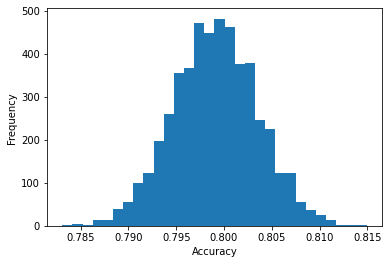

In [92]:
# Histogram of bootstrap accuracy distribution
plt.hist(bootstrap['accuracy'], density=False, bins=30)
plt.ylabel('Frequency')
plt.xlabel('Accuracy');

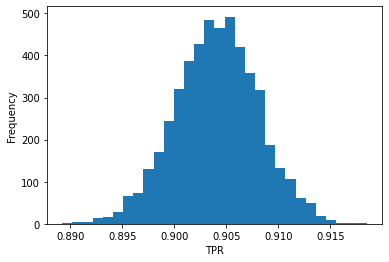

In [93]:
# Histogram of bootstrap TPR distribution
plt.hist(bootstrap['TPR'], density=False, bins=30)
plt.ylabel('Frequency')
plt.xlabel('TPR');

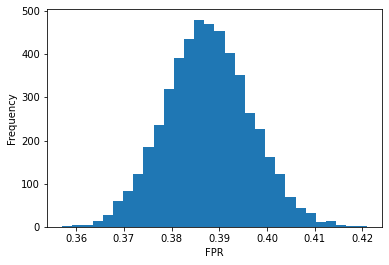

In [94]:
# Histogram of bootstrap FPR distribution
plt.hist(bootstrap['FPR'], density=False, bins=30)
plt.ylabel('Frequency')
plt.xlabel('FPR');